# Imports

In [1]:
# to make relative imports work
import sys

sys.path.insert(1, "../../src/")

In [2]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from backtester.strategy_paper import PaperStrategy
from utils.load_data import load_data



from mpl_bsic import apply_bsic_logo, apply_bsic_style, check_figsize
from mpl_bsic.apply_bsic_style import DEFAULT_TITLE_STYLE


In [3]:
# set logger level
log = logging.getLogger("backtester")

log.setLevel(20)

In [4]:
path = "../../results/results_paper.xlsx"
output_cols = ["Return", "Vol", "Skew", "Kurtosis", "Hit Ratio", "Sharpe"]
writer = pd.ExcelWriter(path, engine="xlsxwriter")


def save(df: pd.DataFrame, sheet_name: str):
    df.columns = output_cols
    df.to_excel(writer, sheet_name)

# Backtesting Data

In [5]:
fx_fixes, swaps_fixes = load_data('../../data/')

In [6]:
MA_WINDOW = 2
REBAL_THRESHOLD = 1

BT_FX = fx_fixes
BT_SWAPS = swaps_fixes

bt_st = PaperStrategy(
    BT_FX, BT_SWAPS, ma_window=MA_WINDOW, rebalancing_threshold=REBAL_THRESHOLD
)
bt_st.run()
perf_st = bt_st.compute_stats()

save(perf_st, 'short_term')

INFO:backtester:Rebalancing 45004.0 times out of 62280.0 (36.13%)


In [7]:
MA_WINDOW = 15

bt_lt = PaperStrategy(
    BT_FX, BT_SWAPS, ma_window=MA_WINDOW, rebalancing_threshold=REBAL_THRESHOLD
)
bt_lt.run()
perf_lt = bt_lt.compute_stats()

save(perf_lt, 'long_term')

INFO:backtester:Rebalancing 28651.0 times out of 62280.0 (23.00%)


In [8]:
writer.close()

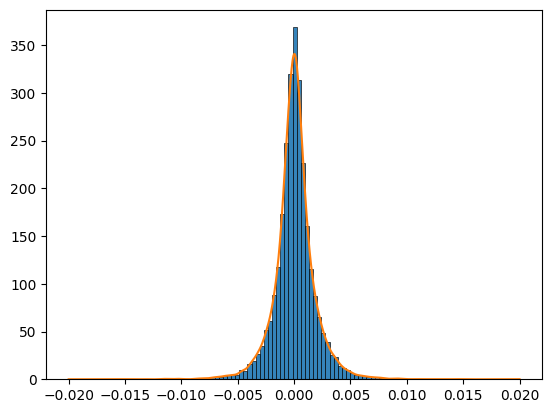

In [10]:
pnl_lt = bt_lt.pnl

xx = np.linspace(-0.02, 0.02, 1000)
kde = stats.gaussian_kde(pnl_lt["total_pct"])

plt.hist(pnl_lt["total_pct"], bins=100, density=True, alpha=.9, edgecolor="black", lw=0.5)
plt.plot(xx, kde(xx), alpha=1)

In [11]:
from matplotlib.axes import Axes

# plt.rcParams.update({"text.usetex": False, "mathtext.rm": "Garamond"})



def plot_returns_dist():
    w, h = (7.32, 2)

    fig, axs = plt.subplots(1, 2, figsize=(w, h))


    check_figsize(w, h, None)


    axs: list[Axes]
    ax2000, ax2010 = axs


    ax2000.set_title("2000-2010")

    ax2010.set_title("2010-2020")

    fig.suptitle("Returns Distributions (LT Signal)", **DEFAULT_TITLE_STYLE, y=1.1)

    apply_bsic_logo(fig, ax2000, scale=0.025)


    apply_bsic_style(fig, ax2000)


    apply_bsic_style(fig, ax2010)

    pnl_2000 = pnl_lt.loc["2000":"2010", "total_pct"]

    ax2000.hist(pnl_2000, bins=100, density=True, lw=0.5, edgecolor="black")

    ax2000.set_yticks([])


    pnl_2010 = pnl_lt.loc["2010":"2020", "total_pct"]


    ax2010.hist(pnl_2010, bins=100, density=True, lw=0.5, edgecolor="black")


    ax2010.set_yticks([])

    fig.subplots_adjust(wspace=0.05)
    txt = "Source: BSIC"
    fig.text(0.5, -0.05, txt, ha="center")

    return fig

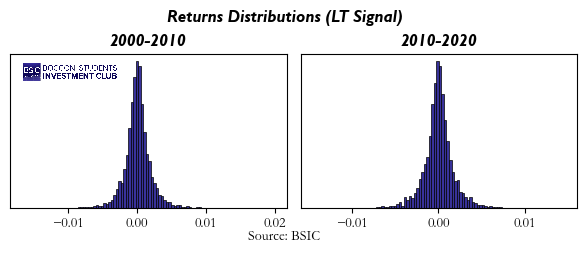

In [12]:
fig = plot_returns_dist()

In [55]:
fig.savefig('../output/returns_dist.svg', bbox_inches='tight', dpi=1200)

# Robustness Checks

In [14]:
paper_rc = pd.read_excel('../../results/robustness_checks.xlsx', sheet_name='paper', index_col=0)

paper_rc.head()

,Total,2000s,2010s
2,0.102771,1.049014,-0.575450
3,0.341608,1.260514,-0.367097
4,0.593001,1.434982,-0.195498
5,0.605392,1.416076,-0.234140
6,0.572226,1.294305,-0.151640


In [15]:
def plot_windows(): 
    w,h = (7, 4)
    fig, ax = plt.subplots(1,1, figsize=(w,h))
    ax: Axes
    ax.set_title('SR against Window Size')
    ax.set_xlabel('MA Window')
    ax.set_ylabel('SR')

    apply_bsic_logo(fig, ax, scale=0.025) 
    apply_bsic_style(fig, ax)


    ax.plot(paper_rc, marker='.', label=['Total', '2000-2010', '2010-2020'])
    ax.legend()
    
    ylims = ax.get_ylim()
    print(ylims)
    ax.set_ylim(ylims[0], 1.75)
    # txt = "Source: BSIC"
    # fig.text(0.5, -0.10, txt, ha="center")

    return fig

(-0.6763742166437026, 1.543966880131086)


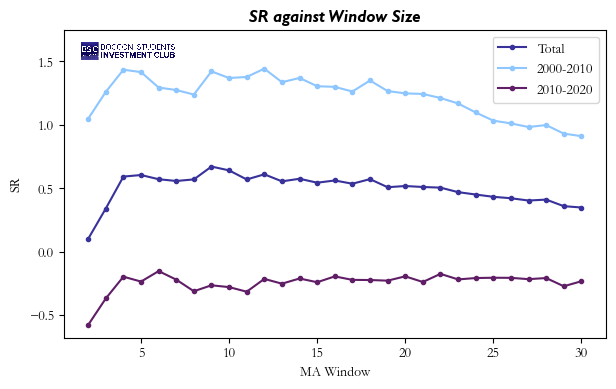

In [16]:
fig = plot_windows()

In [36]:
fig.savefig('../output/plot_line_fede.svg', dpi=1200, bbox_inches='tight')